In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
import numpy as np
from itertools import product

from sailing import SailingGridworld
from common import helper as h

/u/88/brumant1/unix/Documents/rl_course/venv/lib/python3.8/site-packages/glfw/__init__.py:906: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)


In [2]:
gamma = 0.9
eps = 1e-4 
value_update_iter = 30
rock_penalty = -2

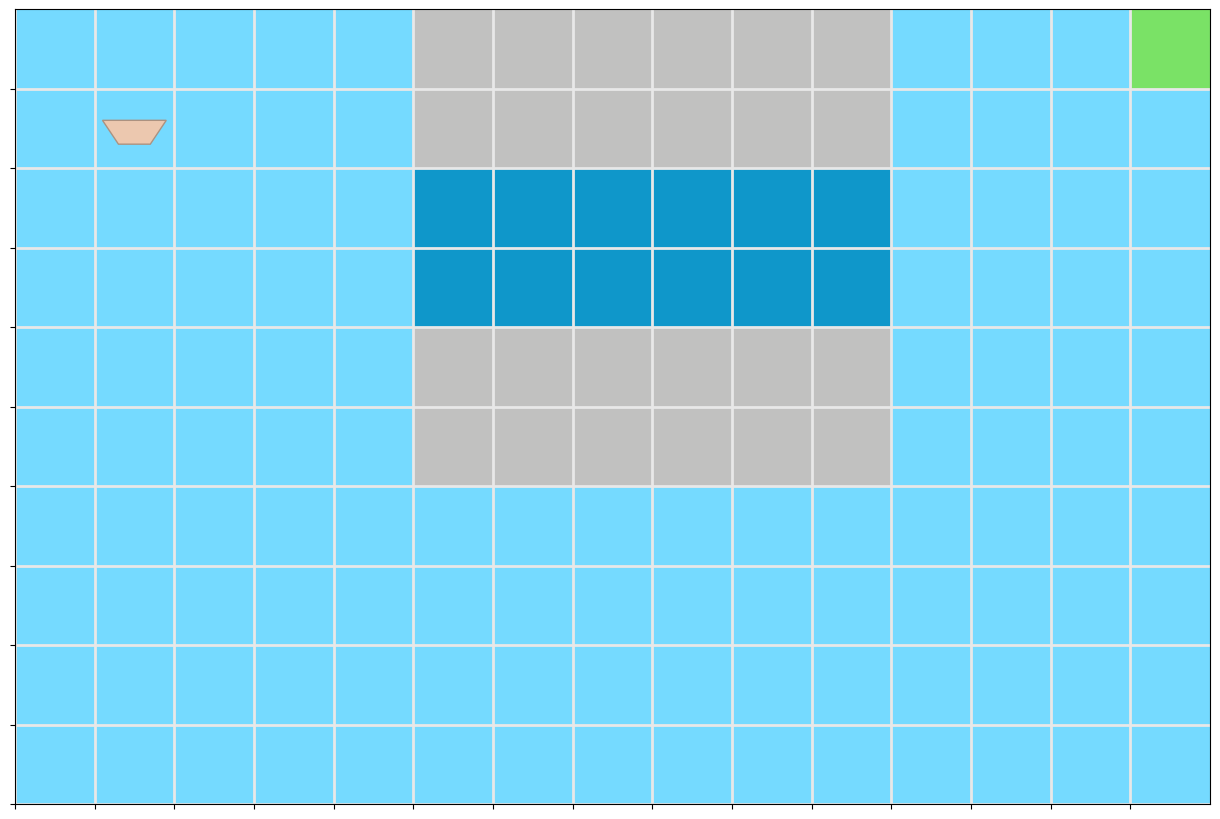

In [3]:
# Set up the environment
env = SailingGridworld(rock_penalty=rock_penalty, value_update_iter=value_update_iter)

In [4]:

def get_values_policy(iterations):
    v_est = np.zeros((env.w, env.h))
    policy = np.zeros((env.w, env.h))
    env.draw_values_policy(v_est, policy)

    for i in range(iterations):
        ########## Your code starts here ##########
        
        # set flag to check for convergence
        conv = True
        # array to store value functions for next timestep
        v_est_next = np.zeros((env.w, env.h))

        # iterate over all squares
        for x in range(env.w):
            for y in range(env.h):
                # if in a terminating square, leave the value at zero
                if ((x,y) == (env.harbour_x, env.harbour_y)) or (env.rocks1_x[0] <= x < env.rocks1_x[1] and env.rocks1_y[0] <= y < env.rocks1_y[1]) or (env.rocks2_x[0] <= x < env.rocks2_x[1] and env.rocks2_y[0] <= y < env.rocks2_y[1]):
                    v_est_next[x,y] = 0.0
                    continue

                # create list for values obtained through different actions
                val = []
                # iterate over all actions
                for a in range(env.n_actions):
                    # obtain list of possible transitions from state through action
                    transitions = env.transitions[x,y,a]
                    # initialize sum 
                    sum = 0.0
                    for t in transitions:
                        # execute calculation
                        sum += t.prob*(t.reward+gamma*v_est[t.state])

                    # add sum for this action to list of values 
                    val.append(sum)

                # update value for current state with maximum computed value
                v_est_next[x,y] = np.max(val)
                # store the action corresponding to that value
                policy[x,y] = np.argmax(val)
                # test for convergence
                if abs(v_est_next[x,y] - v_est[x,y]) >= eps:
                    conv = False

        # make new value functions into the current value functions
        v_est = v_est_next
        # print notification if convergence has been reached
        if conv:
            print("Convergence reached. Iteration:", i+1)

        # draw
        env.draw_values_policy(v_est, policy)

        ########## Your code ends here ##########

    return v_est, policy


In [5]:
# value iteration -- update value estimation and policy
value_est, policy = get_values_policy(iterations=value_update_iter)

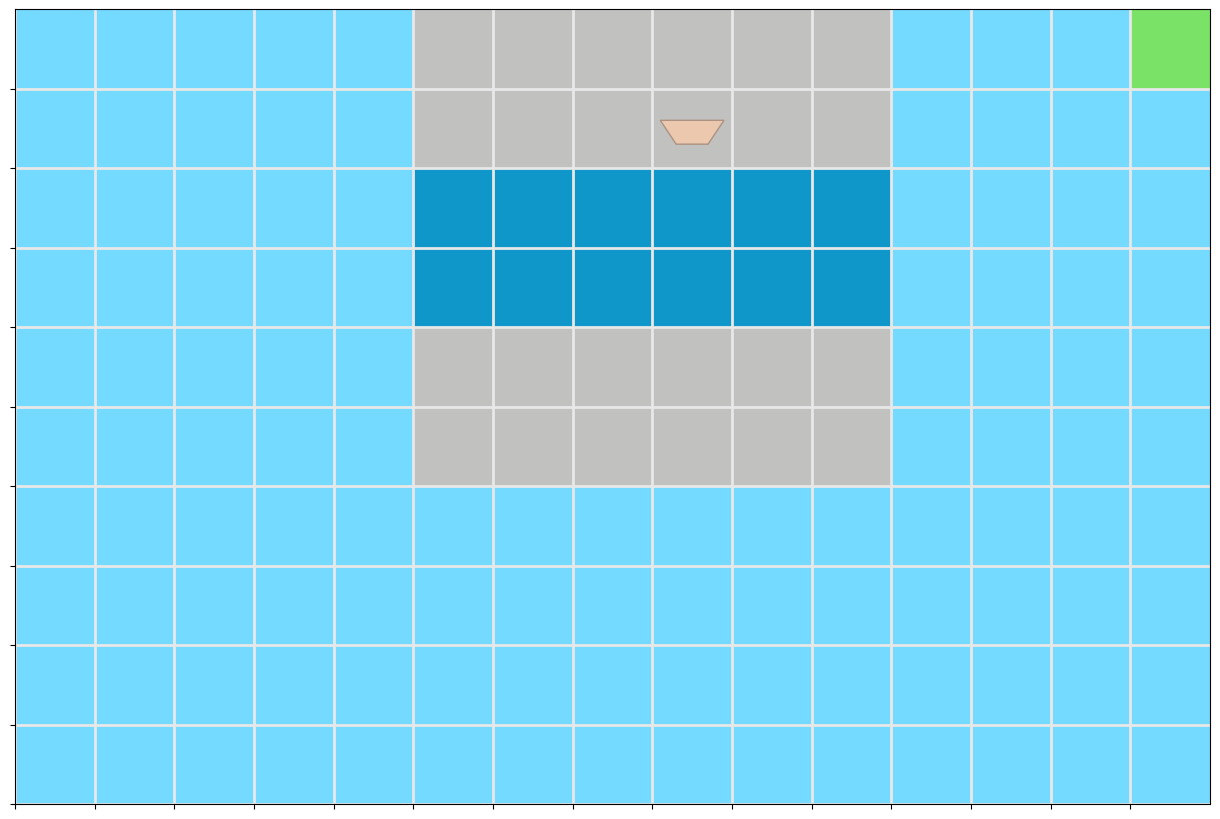

In [6]:
# Eval policy
N = 1 # TODO: change for task 4
for ep in range(N):
    state = env.reset()
    done = False
    while not done:

        ########## You code starts here ##########

        # Use the policy to take the optimal action 
        action = policy[state]

        # Take a step in the environment
        state, reward, done, _ = env.step(action)
        
        ########## You code ends here ##########
        
        # Comment out the line below to disable rendering and make computations faster
        env.render()


In [7]:
# save value and policy
h.save_object({'value': value_est, 'policy': policy}, './value_policy.pkl')